# RICE LEAF DIESEASE PREDICTION USING CNN

**MADE BY TEAM ID: PTID-CDS-JUL22-1339**

**PROJECT ID: PRCP-1014-VaccinePred**

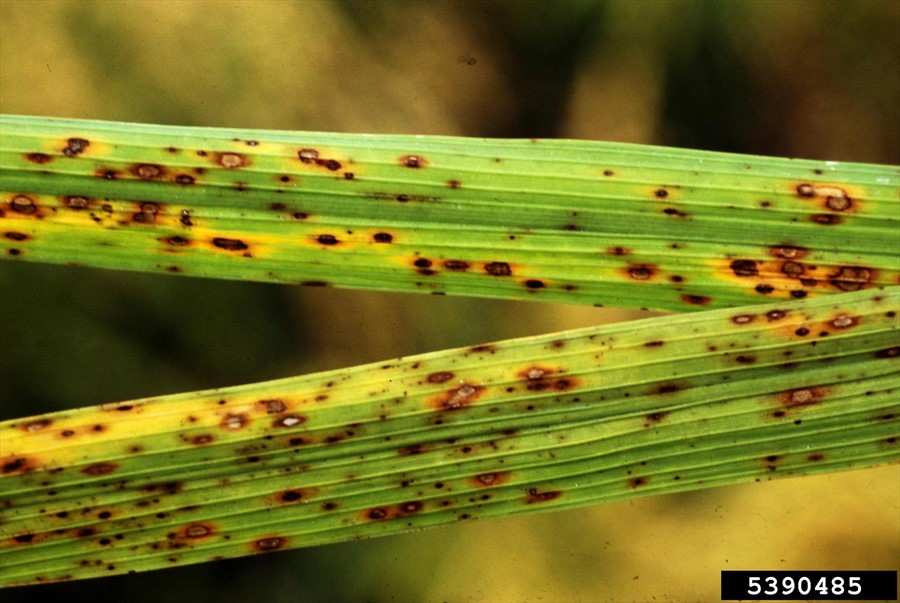

## BUSINESS CASE - To predict disease of rice leaf using CNN

Pipline of this Model Building :-
- Problem Defination
* Import libraries
* Domain analysis
* Building sequential model using keras
* Flattening the result
* Dividing the data into train and test data
* ANN model building
* Trying with various epochs and batch size 
* save the best model to use further
* load the model and test with image from google 

# 1] PROBLEM DEFINATION
- To predict disease of rice leaf using CNN

# 2] IMPORTING NECESSORY MODULES

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np

# 3] DOMNAIN ANALYSIS

- There are three folders of three disease 
- 1) Bacterial leaf blight
- 2) Brown spot
- 3) Leaf smut

# 4] BUILDING MODEL WITH SEQUENTIAL KERAS MODEL

In [2]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip= True,
        fill_mode='nearest')

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 5] FLATTENING THE RESULT AND CONNECTING TO ANN WITH THREE NODES

In [4]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 6] DIVIDING THE DATA IN TRAINING AND TESTING DATA

# The data is divided in 80 % Train and 20 % Test data manually.

In [5]:
batch_size = 16

train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)    


train_generator = train_datagen.flow_from_directory(
                'E:/Data mites/INTERNSHIP DETAILS/PRCP-1001-RiceLeaf/Data/train',
                target_size=(150,150),
                batch_size=batch_size,
                class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                'E:/Data mites/INTERNSHIP DETAILS/PRCP-1001-RiceLeaf/Data/test',
                target_size=(150,150),
                batch_size=batch_size,
                class_mode='categorical')

Found 95 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [6]:
import time

## Trying with epoch = 1

In [11]:
%%time
model.fit_generator(
        train_generator,
        steps_per_epoch = 95 // batch_size,
        epochs=1,
        validation_data=validation_generator,
        validation_steps = 24 // batch_size)

<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


5/5 [==============================] - 6s 1s/step - loss: 1.1123 - accuracy: 0.3418 - val_loss: 1.0938 - val_accuracy: 0.3125
Wall time: 6.4 s


## Trying with epochs = 2

In [25]:
%%time
model.fit_generator(
        train_generator,
        steps_per_epoch = 95 // batch_size,
        epochs=2,
        validation_data=validation_generator,
        validation_steps = 24 // batch_size)

<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/2
5/5 [==============================] - 5s 1s/step - loss: 0.5153 - accuracy: 0.7848 - val_loss: 1.6904 - val_accuracy: 0.5000
Epoch 2/2
5/5 [==============================] - 5s 905ms/step - loss: 0.4915 - accuracy: 0.7722 - val_loss: 1.3204 - val_accuracy: 0.7500
Wall time: 10.5 s


## Trying with epochs = 3

In [29]:
%%time
model.fit_generator(
        train_generator,
        steps_per_epoch = 95 // batch_size,
        epochs=3,
        validation_data=validation_generator,
        validation_steps = 24 // batch_size)

<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/3
5/5 [==============================] - 5s 1s/step - loss: 0.3319 - accuracy: 0.8987 - val_loss: 1.6297 - val_accuracy: 0.5625
Epoch 2/3
5/5 [==============================] - 5s 969ms/step - loss: 0.3015 - accuracy: 0.8608 - val_loss: 1.1454 - val_accuracy: 0.4375
Epoch 3/3
5/5 [==============================] - 4s 901ms/step - loss: 0.3683 - accuracy: 0.8750 - val_loss: 0.8648 - val_accuracy: 0.8750
Wall time: 15.2 s


# Trying with epochs = 8

In [14]:
%%time
model.fit_generator(
        train_generator,
        steps_per_epoch = 95 // batch_size,
        epochs=8,
        validation_data=validation_generator,
        validation_steps = 24 // batch_size)

<timed eval>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/8
5/5 [==============================] - 7s 1s/step - loss: 0.6615 - accuracy: 0.7215 - val_loss: 0.7292 - val_accuracy: 0.7500
Epoch 2/8
5/5 [==============================] - 7s 1s/step - loss: 0.4510 - accuracy: 0.8481 - val_loss: 1.0668 - val_accuracy: 0.4375
Epoch 3/8
5/5 [==============================] - 7s 1s/step - loss: 0.4272 - accuracy: 0.8375 - val_loss: 0.6986 - val_accuracy: 0.6250
Epoch 4/8
5/5 [==============================] - 6s 1s/step - loss: 0.5429 - accuracy: 0.7848 - val_loss: 1.2247 - val_accuracy: 0.4375
Epoch 5/8
5/5 [==============================] - 7s 1s/step - loss: 0.4848 - accuracy: 0.8250 - val_loss: 1.1894 - val_accuracy: 0.5000
Epoch 6/8
5/5 [==============================] - 6s 1s/step - loss: 0.6853 - accuracy: 0.7089 - val_loss: 0.8069 - val_accuracy: 0.6250
Epoch 7/8
5/5 [==============================] - 6s 1s/step - loss: 0.4534 - accuracy: 0.8228 - val_loss: 0.9204 - val_accuracy: 0.5625
Epoch 8/8
5/5 [==============================] -

# 7] Saving the model

In [24]:
model.save_weights('riceleafpred1.h5')

## Note - Tried batch size 8 and 32 but best result found on batch size of 16

# 8] Testing the model 

## Note - Downloaded the image from google different than in train and test folders

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img = load_img('C:/Users/MAYUR/Downloads/RICE LEAF DISEASE DETECTION/bacterial leaf blight.jpg')
x=img_to_array(img.resize([150,150]))
x=x.reshape((1,) + x.shape)

In [26]:
x.shape

(1, 150, 150, 3)

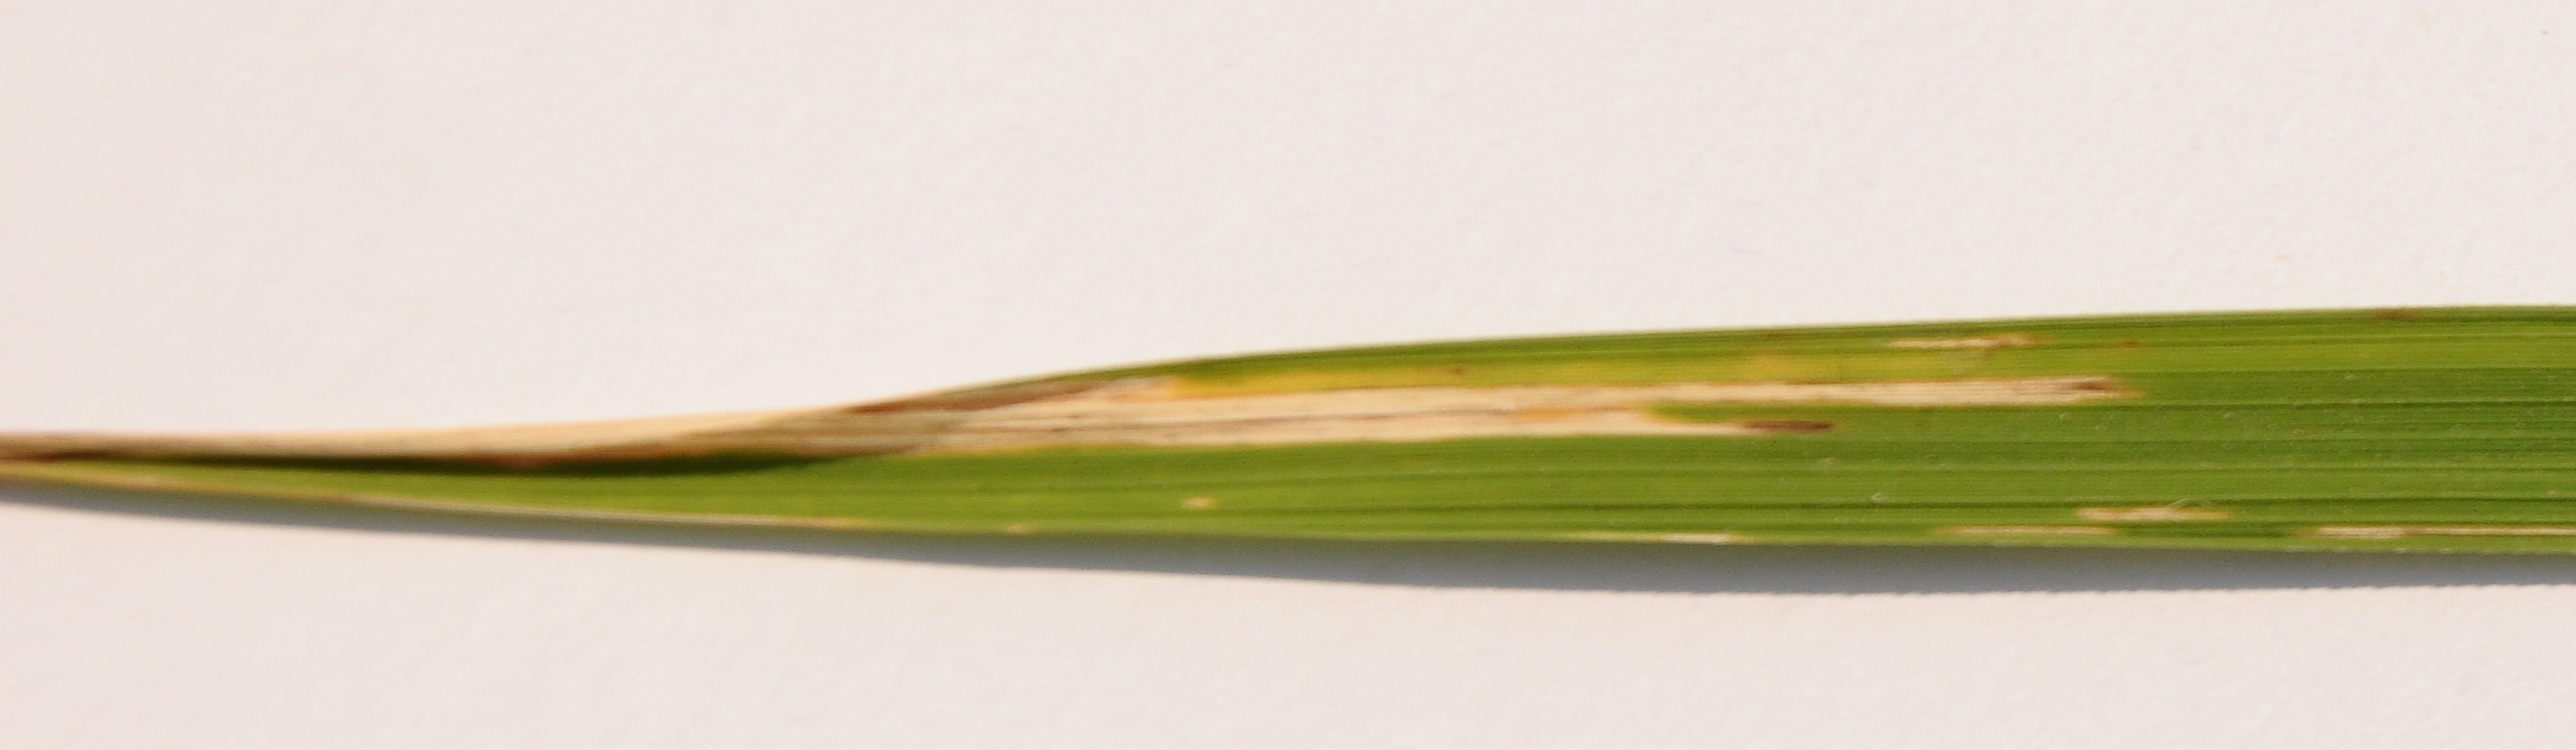

In [27]:
img

In [28]:
import numpy as np
if np.argmax(model.predict(x)==0):
    print('Bacterial leaf blight')
elif np.argmax(model.predict(x)==1):
    print('Brown spot')
elif np.argmax(model.predict(x)==2):
    print('Leaf smut')

1/1 [==============================] - 0s 49ms/step
Bacterial leaf blight


## The Prediction is right

# 9] Conclusion 
# - Hence we have created the model with CNN having validation Accuracy OF 87%